In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import optimizers

In [4]:
#load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

n_classes = 10
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

('Train matrix shape', (60000, 784))
('Test matrix shape', (10000, 784))


In [0]:
model = Sequential()
model.add(Dense(700, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(500))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.4782 - acc: 0.9153 - val_loss: 0.1070 - val_acc: 0.9668
Epoch 2/10
 - 10s - loss: 0.1009 - acc: 0.9694 - val_loss: 0.0838 - val_acc: 0.9743
Epoch 3/10
 - 10s - loss: 0.0721 - acc: 0.9779 - val_loss: 0.0734 - val_acc: 0.9763
Epoch 4/10
 - 10s - loss: 0.0556 - acc: 0.9829 - val_loss: 0.0651 - val_acc: 0.9799
Epoch 5/10
 - 10s - loss: 0.0448 - acc: 0.9863 - val_loss: 0.0618 - val_acc: 0.9801
Epoch 6/10
 - 10s - loss: 0.0374 - acc: 0.9886 - val_loss: 0.0583 - val_acc: 0.9815
Epoch 7/10
 - 10s - loss: 0.0324 - acc: 0.9902 - val_loss: 0.0574 - val_acc: 0.9830
Epoch 8/10
 - 10s - loss: 0.0269 - acc: 0.9921 - val_loss: 0.0576 - val_acc: 0.9821
Epoch 9/10
 - 10s - loss: 0.0230 - acc: 0.9934 - val_loss: 0.0541 - val_acc: 0.9835
Epoch 10/10
 - 10s - loss: 0.0208 - acc: 0.9941 - val_loss: 0.0564 - val_acc: 0.9836
('Test Loss', 0.05635860670933034)
('Test Accuracy', 0.9836)


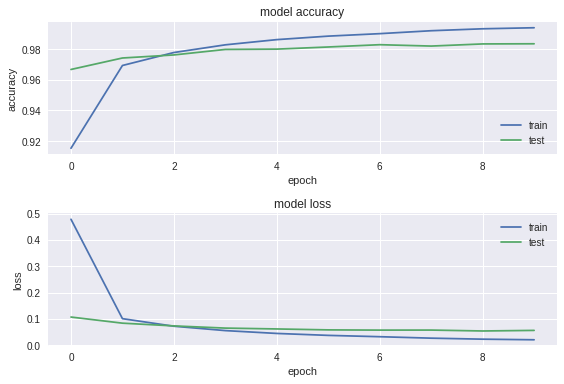

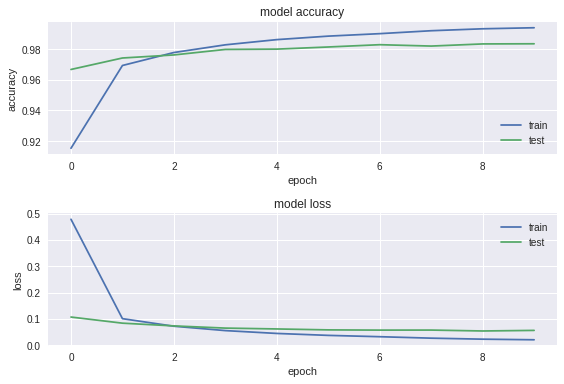

In [10]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
# you can change the optimizer here
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adagrad)

r = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))

m = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", m[0])
print("Test Accuracy", m[1])


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig